In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def BS_call_price(sigma, S, K, r, T, t):
    #Danner d1 og d2:
    #d1: Sandsynligheden for, at optionen ender ITM under det ækvivalente martingalmål med det underliggende aktiv som numeraire
    d1 = np.multiply(1. / (sigma*np.sqrt((T-t))),(np.log(S/K) + (r + sigma**2 / 2.) * (T-t)))
    
    #d2: Sandsynligheden for, at optionen ender ITM under det ækvivalente martingalmål med den risikofrie obligation som numeraire
    d2 = d1 - sigma * np.sqrt((T-t))
    
    #Udregner vores Call-pris:
    call = np.multiply(norm.cdf(d1),S) - np.multiply(norm.cdf(d2) * K, np.exp(-r * (T-t)))
    
    return call

In [3]:
def bachelier(sigma, S, K, r, T, t):
    sigma1 = sigma*S
    
    z = (S - K * np.exp(-r*(T-t)))/(sigma1*np.sqrt((1-np.exp(-2*r*(T-t)))/(2*r)))
    
    C = (S - K * np.exp(-r*(T-t)))*norm.cdf(z) + sigma1 *np.sqrt((1-np.exp(-2*r*(T-t)))/(2*r)) * norm.pdf(z)
    
    #Bemærkning: bemærk forskel mellem stor og lille phi.
    
    return C

In [4]:
"""Sammenligner forskellige Strike-priser"""
S = np.linspace(90, 110, 100)

#Sætter konstant af andre værdier:
sigma = 0.1
r = 0.05
T = 3
t = 0
K = 105

#  Calculate option prices based on both models

In [5]:
C_bs = BS_call_price(sigma, S, K, r, T, t)     #Black-Scholes
C_ba = bachelier(sigma, S, K, r, T, t)      #Bachelier

Text(0, 0.5, 'Optionsværdi')

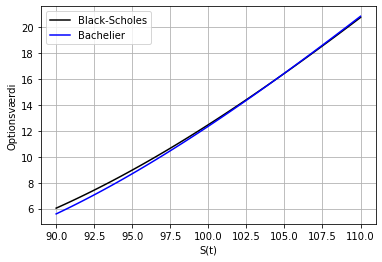

In [6]:
#  Plot the results
plt.plot(S, C_bs, 'k', label = 'Black-Scholes')
plt.plot(S, C_ba, 'b', label = 'Bachelier')
plt.grid(True)
plt.legend()
plt.xlabel('S(t)')
plt.ylabel('Optionsværdi')